In [1]:
# importing basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Reading data here
titanic = pd.read_csv('data/train.csv')
titanic_bkp=titanic.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Analysis

In [3]:
# Analysing data one by one on each columns : starting with info
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Passenger Id looks like key column : lets look for duplicates
titanic['PassengerId'].nunique()

891

In [5]:
# I believe passengerid no longer needed
#titanic = titanic.set_index('PassengerId')

##### Column : Survived
- This is our target column

In [6]:
# Lets check the counts
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

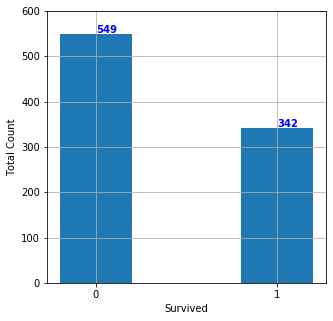

In [7]:
# Visualize counts
fig,ax =plt.subplots(figsize=(5,5))
ax.bar(x=[0,1],height=list(titanic['Survived'].value_counts()),width=0.4)
for i,v in enumerate(list(titanic['Survived'].value_counts())):
    ax.text(i,v+10,str(v),color='blue', va='center', fontweight='bold')
plt.xlabel('Survived')
plt.ylabel('Total Count')
plt.xticks([0,1])
plt.ylim(0,600)
plt.grid()
plt.show()

##### Next variable: Pclass

In [8]:
# Checking the counts 
titanic['Pclass'].count()

891

In [9]:
vals = {}
for i in titanic['Pclass'].unique().tolist():
    vals[i]=titanic[titanic['Pclass']==i]['Pclass'].count()

vals

{3: 491, 1: 216, 2: 184}

In [10]:
vals.keys(), vals.values()

(dict_keys([3, 1, 2]), dict_values([491, 216, 184]))

(0, 600)

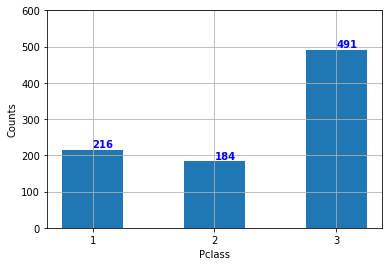

In [11]:
# Visualize the counts
fig,ax = plt.subplots()
ax.bar(x=list(vals.keys()), height=list(vals.values()), width=0.5)
for i in vals.keys():
    ax.text(i,vals[i]+15, str(vals[i]),color='blue',va='center',fontweight='bold')
plt.xlabel('Pclass')
plt.ylabel('Counts')
plt.xticks([1,2,3])
plt.grid()
plt.ylim(0,600)

In [12]:
min(vals.values())

184

In [13]:
# Lets create a function for checking value counts of next categories 
def viz_value_counts(datadf,field):
    vals = {}
    for i in titanic[field].unique().tolist():
        vals[i]=titanic[titanic[field]==i][field].count()
    fig,ax = plt.subplots()
    ax.bar(x=list(vals.keys()), height=list(vals.values()), width=0.5)
    for i in vals.keys():
        ax.text(i,vals[i]+15, str(vals[i]),color='blue',va='center',fontweight='bold')
    plt.xlabel(field)
    plt.ylabel('Counts')
    plt.xticks(list(vals.keys()))
    plt.grid()
    plt.ylim(0,max(vals.values())+100)

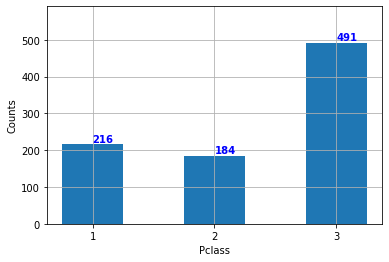

In [14]:
# Test the function 
viz_value_counts(titanic,'Pclass')

In [15]:
# Now creating a Category plot with multiple categories 
# Example : How many person from each categories belong to each Survived class
def viz_catplots(datadf,field1,field2):
    plt.figure(figsize=(10,6))
    g=sns.catplot(x=field2,col=field1, data=datadf[[field1,field2]], kind="count", height=2.5, aspect=.8)
    g.set_axis_labels('Survived','Counts')
    g.fig.set_size_inches(10, 6)
    g.fig.subplots_adjust(top=0.81, right=0.86)
    print(titanic[['PassengerId',field1,field2]].groupby([field1,field2]).PassengerId.nunique())

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64


<Figure size 720x432 with 0 Axes>

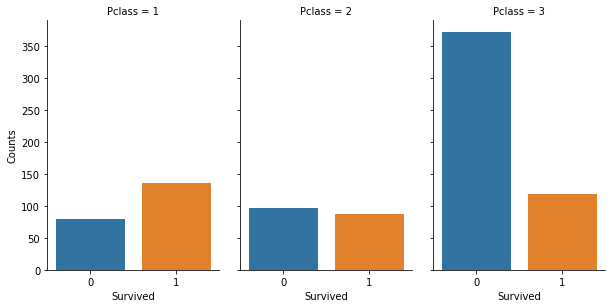

In [16]:
viz_catplots(titanic,'Pclass','Survived')

#### Leaving Pname aside, lets analyze gender

In [17]:
# First of all value counts
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
# Converting into numerical variable, male:1 female:0
titanic['gender'] = titanic['Sex'].map({'male':1,'female':0})
titanic['gender'].value_counts()

1    577
0    314
Name: gender, dtype: int64

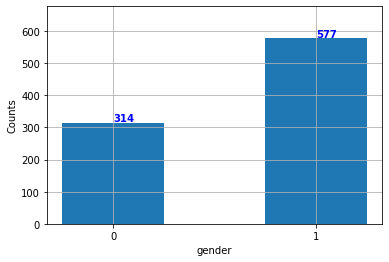

In [19]:
# Visualize gender wise counts
viz_value_counts(titanic,'gender')

gender  Survived
0       0            81
        1           233
1       0           468
        1           109
Name: PassengerId, dtype: int64


<Figure size 720x432 with 0 Axes>

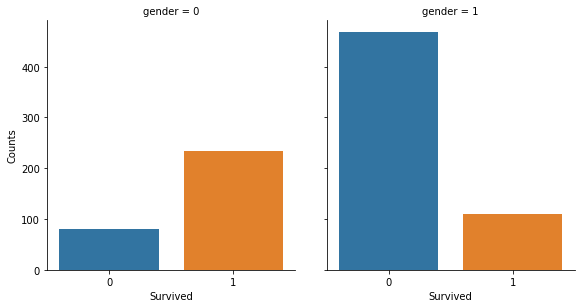

In [20]:
# Visualize gender wise counts of death
viz_catplots(titanic,'gender','Survived')

               PassengerId
Pclass Sex                
1      female           94
       male            122
2      female           76
       male            108
3      female          144
       male            347


<Figure size 1440x720 with 0 Axes>

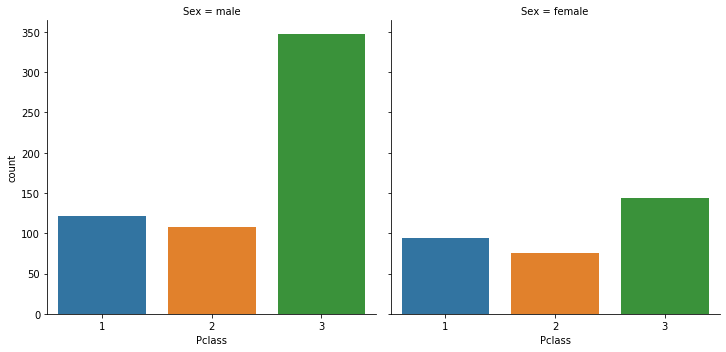

In [21]:
# Now How many men and Female belong to each Passenger class
plt.figure(figsize=(20,10))
g=sns.catplot(data=titanic,x='Pclass',col='Sex',kind='count')
print(titanic[['Pclass','Sex','PassengerId']].groupby(['Pclass','Sex']).count())
# iterate thru' axes
#for ax in g.axes.ravel():
#    for c in ax.containers:
#        labels = [v.get_height() for v in c]
#        ax.bar_label(c, labels=labels, label_type='edge')
plt.show()

    Pclass     Sex  Survived  PassengerId
0        1  female         0            3
1        1  female         1           91
2        1    male         0           77
3        1    male         1           45
4        2  female         0            6
5        2  female         1           70
6        2    male         0           91
7        2    male         1           17
8        3  female         0           72
9        3  female         1           72
10       3    male         0          300
11       3    male         1           47


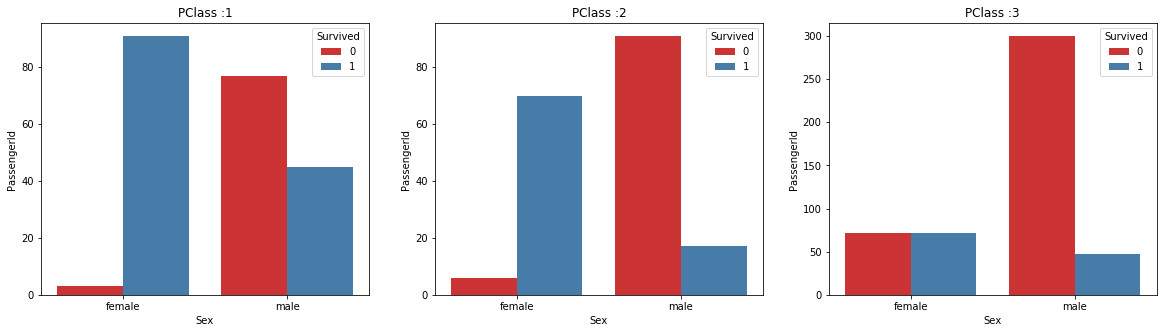

In [22]:
# Checking how many persons killed per class per gender
catSurvive = titanic[['Pclass','Sex','PassengerId','Survived']].groupby(['Pclass','Sex','Survived']).count()
catSurvive=catSurvive.reset_index()
print(catSurvive)

plt.figure(figsize=(20,5))
for i in catSurvive['Pclass'].unique().tolist() :
    plt.subplot(1,3,i)
    sns.barplot(data=catSurvive[catSurvive['Pclass']==i],x='Sex',y='PassengerId',hue='Survived',palette="Set1")
    plt.title('PClass :'+str(i))
plt.show()

#### Next Variable : Age

In [23]:
# how many rows in Age are having null
titanic['Age'].isnull().sum()

177

In [24]:
# In those 177 rows How many survived ( where age is null)
titanic[titanic['Age'].isnull()]['Survived'].value_counts()

0    125
1     52
Name: Survived, dtype: int64

#### These 177 rows needed to be treated separately

In [25]:
# First of all lets select the rows having Age as not null
titanic_age_notnull = titanic[~titanic['Age'].isnull()]
titanic_age_notnull.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,gender
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514,0.634454
std,259.119524,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930,0.481921
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000,0.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700,1.000000
75%,677.750000,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000


Text(0.5, 1.0, 'Range of survival in each age')

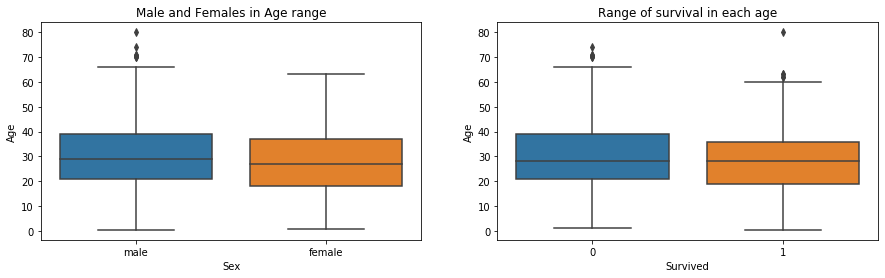

In [26]:
# Let us Analyze Age w.r.t  variables : sex
plt.figure(figsize=(15,4))
plt.subplot(121)
sns.boxplot(data=titanic, x="Sex",y="Age")
plt.title("Male and Females in Age range")
plt.subplot(122)
sns.boxplot(data=titanic,x='Survived',y='Age')
plt.title("Range of survival in each age")

- In both cases Age does not make much difference
- Combining Age with Gender to check the counts in each cases

Text(0.5, 1.0, ' Gender Female - Age wise survival')

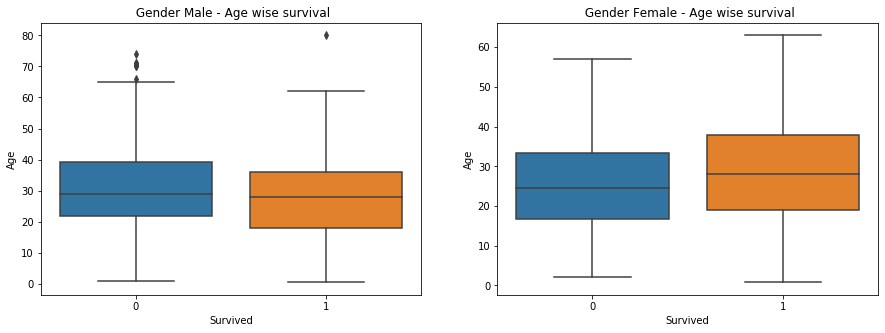

In [27]:
# lets check Gender wise survival status with respect to age
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.boxplot(data=titanic[titanic['Sex']=='male'],x='Survived',y='Age')
plt.title(" Gender Male - Age wise survival")

plt.subplot(122)
sns.boxplot(data=titanic[titanic['Sex']=='female'],x='Survived',y='Age')
plt.title(" Gender Female - Age wise survival")


#### Variable : Fare


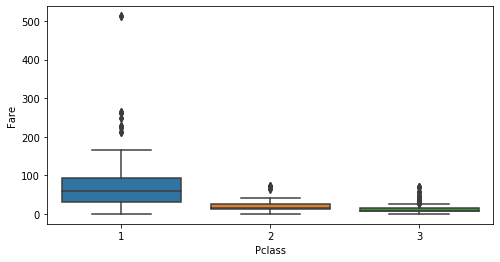

In [28]:
plt.figure(figsize=(8,4))
sns.boxplot(data=titanic,x="Pclass",y="Fare")
plt.show()

In [29]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


#### Variable: SibSp
- SibSp is the number of siblings or spouse of a person onboard.

In [30]:
# What are the distinct values
titanic.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

#### Variable : Parch
- Parch - Number of Parents/Children Aboard

In [31]:
titanic.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

- We can clearly see that there are certain observations very low - needs boosting

#### Variable : Cabin


In [32]:
# how many null values?
titanic.Cabin.isnull().sum()

687

In [33]:
# Lets extract first character of Cabin, Hope it holds some information
titanic_wthCabin = titanic[~titanic['Cabin'].isnull()]
titanic_wthCabin['Cabin_Class'] = titanic_wthCabin['Cabin'].map(lambda x: str(x)[0])
titanic = pd.merge(titanic,titanic_wthCabin,left_on='PassengerId',right_on='PassengerId',suffixes=('','_C'),how='left')

titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_C,Age_C,SibSp_C,Parch_C,Ticket_C,Fare_C,Cabin_C,Embarked_C,gender_C,Cabin_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,female,38.0,1.0,0.0,PC 17599,71.2833,C85,C,0.0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,female,35.0,1.0,0.0,113803,53.1000,C123,S,0.0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
cols_to_drop = [i for i in titanic.columns if i[-2:]=='_C' ]
titanic = titanic.drop(cols_to_drop,axis=1)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender,Cabin_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,NaN


In [35]:
# Now let us find how many Cabin Classes
titanic['Cabin_Class'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin_Class, dtype: int64

In [36]:
# How is it related to fare or passenger class?
titanic[['Cabin_Class','Pclass']].drop_duplicates().dropna().sort_values(['Cabin_Class','Pclass'])


,Cabin_Class,Pclass
23,A,1
31,B,1
1,C,1
52,D,1
21,D,2
6,E,1
123,E,2
429,E,3
66,F,2
75,F,3


In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
gender         891 non-null int64
Cabin_Class    204 non-null object
dtypes: float64(2), int64(6), object(6)
memory usage: 104.4+ KB


In [38]:
# What is the relation with each cases  of Cabin and passenger class
# 1. Creating new column
titanic['CabinClass_Pclass']=titanic['Cabin_Class'] + titanic['Pclass'].astype(str)
titanic['CabinClass_Pclass'].drop_duplicates().dropna()

1      C1
6      E1
10     G3
21     D2
23     A1
31     B1
52     D1
66     F2
75     F3
123    E2
339    T1
429    E3
Name: CabinClass_Pclass, dtype: object

In [39]:
# Lets check the effect
cabineffect =titanic[['CabinClass_Pclass','PassengerId','Survived']].groupby(['CabinClass_Pclass','Survived']).count()
cabineffect = cabineffect.reset_index()
cabineffect

,CabinClass_Pclass,Survived,PassengerId
0,A1,0,8
1,A1,1,7
2,B1,0,12
3,B1,1,35
4,C1,0,24
5,C1,1,35
6,D1,0,7
7,D1,1,22
8,D2,0,1
9,D2,1,3


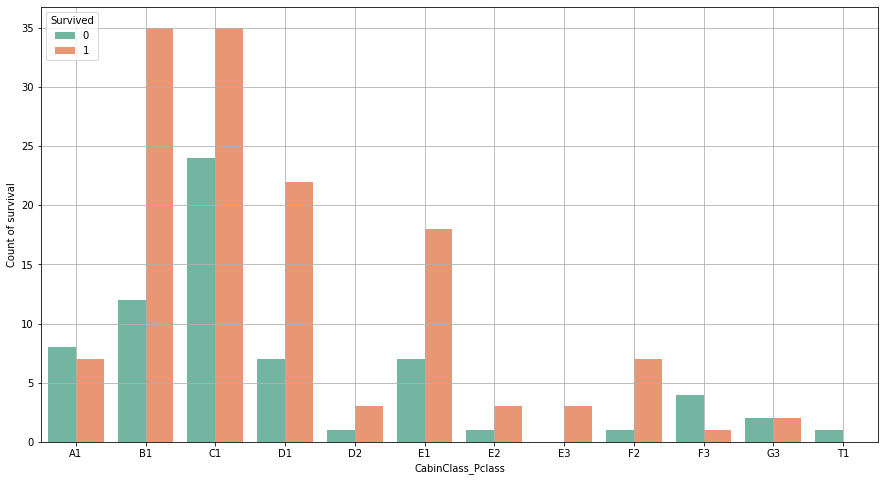

In [40]:
# Lets visualize it
plt.figure(figsize=(15,8))
sns.barplot(data=cabineffect,x='CabinClass_Pclass',y='PassengerId',hue='Survived',palette='Set2')
plt.xlabel('CabinClass_Pclass')
plt.ylabel('Count of survival')
plt.grid()
plt.show()

- There is a lot of variance present
- CabinClass of B1, C1 and D1 has lot of effect on death



### Variable: Embarked

In [41]:
titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [42]:
# How is it related to Survived?
Embarked= titanic[['Embarked','Survived','PassengerId']].groupby(['Embarked','Survived']).count()
Embarked = Embarked.reset_index()
Embarked

,Embarked,Survived,PassengerId
0,C,0,75
1,C,1,93
2,Q,0,47
3,Q,1,30
4,S,0,427
5,S,1,217


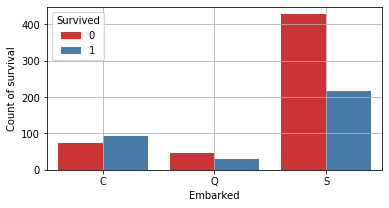

In [43]:
# Lets visualize it
plt.figure(figsize=(6,3))
sns.barplot(data=Embarked,x='Embarked',y='PassengerId',hue='Survived',palette='Set1')
plt.xlabel('Embarked')
plt.ylabel('Count of survival')
plt.grid()
plt.show()

In [44]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'gender', 'Cabin_Class',
       'CabinClass_Pclass'],
      dtype='object')

In [45]:
# Creating a final df column to use it with Model
finaldf = titanic[['Survived', 'Pclass','Age', 'SibSp','Parch','Fare', 'Embarked', 'gender','CabinClass_Pclass']].copy()
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass
0,0,3,22.0,1,0,7.2500,S,1,NaN
1,1,1,38.0,1,0,71.2833,C,0,C1
2,1,3,26.0,0,0,7.9250,S,0,NaN
3,1,1,35.0,1,0,53.1000,S,0,C1
4,0,3,35.0,0,0,8.0500,S,1,NaN


In [46]:
# Converting everything into numeric
embarked = pd.get_dummies(finaldf['Embarked'],prefix='Embarked_')
print(embarked.shape)
embarked.head()

(891, 3)


,Embarked__C,Embarked__Q,Embarked__S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [47]:
finaldf = pd.concat([finaldf,embarked],axis=1)
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass,Embarked__C,Embarked__Q,Embarked__S
0,0,3,22.0,1,0,7.2500,S,1,NaN,0,0,1
1,1,1,38.0,1,0,71.2833,C,0,C1,1,0,0
2,1,3,26.0,0,0,7.9250,S,0,NaN,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,C1,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,NaN,0,0,1


In [48]:
# Doing the same for CabinClass_Pclass
cabinclass = pd.get_dummies(finaldf['CabinClass_Pclass'],prefix='CabinClass_')
print(cabinclass.shape)
cabinclass.head()

(891, 12)


,CabinClass__A1,CabinClass__B1,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [49]:
finaldf = pd.concat([finaldf,cabinclass],axis=1)
finaldf.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,gender,CabinClass_Pclass,Embarked__C,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,S,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,C,0,C1,1,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,NaN,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,S,0,C1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,S,1,NaN,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
finaldf_numeric = finaldf.drop(['Embarked','CabinClass_Pclass'],axis=1)
finaldf_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Embarked__C,Embarked__Q,Embarked__S,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


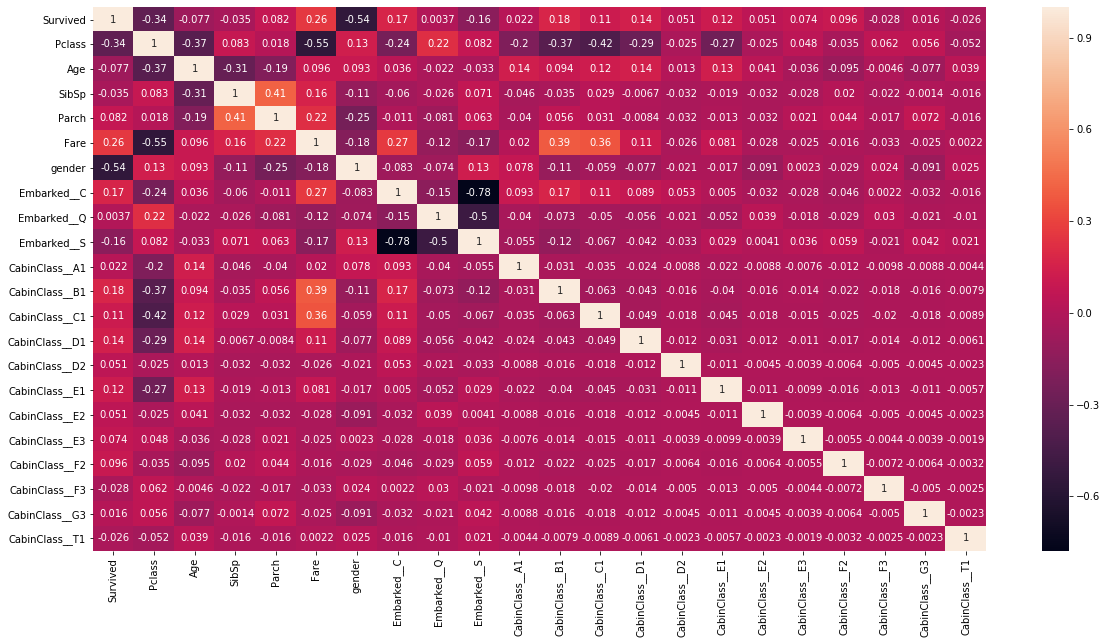

In [51]:
# Lets check the correlations between all these numeric columns
plt.figure(figsize=(20,10))
sns.heatmap(finaldf_numeric.corr(),annot=True)


In [52]:
# Lets drop Embarked_C as it it giving us same information as dummies
finaldf_numeric = finaldf_numeric.drop('Embarked__C',axis=1)
finaldf_numeric.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Embarked__Q,Embarked__S,CabinClass__A1,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
0,0,3,22.0,1,0,7.2500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# Let us scale - Age and Fare
from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler(feature_range=(0,1))
scaler_transform = scaler.fit_transform(finaldf_numeric[['Age','Fare']])
scaler_transformdf = pd.DataFrame(scaler_transform,columns=['Age_norm','Fare_norm'])
scaler_transformdf.head()

,Age_norm,Fare_norm
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


In [55]:
finaldf = pd.concat([finaldf,scaler_transformdf],axis=1)
finaldf = finaldf.drop(['Age','Fare'],axis=1)
finaldf.head()

,Survived,Pclass,SibSp,Parch,Embarked,gender,CabinClass_Pclass,Embarked__C,Embarked__Q,Embarked__S,...,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1,Age_norm,Fare_norm
0,0,3,1,0,S,1,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0.271174,0.014151
1,1,1,1,0,C,0,C1,1,0,0,...,0,0,0,0,0,0,0,0,0.472229,0.139136
2,1,3,0,0,S,0,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0.321438,0.015469
3,1,1,1,0,S,0,C1,0,0,1,...,0,0,0,0,0,0,0,0,0.434531,0.103644
4,0,3,0,0,S,1,NaN,0,0,1,...,0,0,0,0,0,0,0,0,0.434531,0.015713


In [56]:
# Droping textual columns and creating new dataframe
finaldf_model = finaldf.drop(['Embarked','CabinClass_Pclass'],axis=1)
finaldf_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 22 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
SibSp             891 non-null int64
Parch             891 non-null int64
gender            891 non-null int64
Embarked__C       891 non-null uint8
Embarked__Q       891 non-null uint8
Embarked__S       891 non-null uint8
CabinClass__A1    891 non-null uint8
CabinClass__B1    891 non-null uint8
CabinClass__C1    891 non-null uint8
CabinClass__D1    891 non-null uint8
CabinClass__D2    891 non-null uint8
CabinClass__E1    891 non-null uint8
CabinClass__E2    891 non-null uint8
CabinClass__E3    891 non-null uint8
CabinClass__F2    891 non-null uint8
CabinClass__F3    891 non-null uint8
CabinClass__G3    891 non-null uint8
CabinClass__T1    891 non-null uint8
Age_norm          714 non-null float64
Fare_norm         891 non-null float64
dtypes: float64(2), int64(5), uint8(15)
memory usage: 68.7 KB


- Constructing two separate dataframes for Age and without Age

In [57]:
finaldf_age = finaldf_model[~finaldf_model['Age_norm'].isnull()]
finaldf_noage =finaldf_model[finaldf_model['Age_norm'].isnull()]
finaldf_age.shape,finaldf_noage.shape,finaldf_model.shape

((714, 22), (177, 22), (891, 22))

In [58]:
y_age = finaldf_age.pop('Survived')
X_age = finaldf_age

y_noage = finaldf_noage.pop('Survived')
X_noage = finaldf_noage

y_full = finaldf_model.pop('Survived')
X_full = finaldf_model

In [59]:
from matplotlib import cm
new_inferno = cm.get_cmap('RdYlBu', 5)# visualize with the new_inferno colormaps

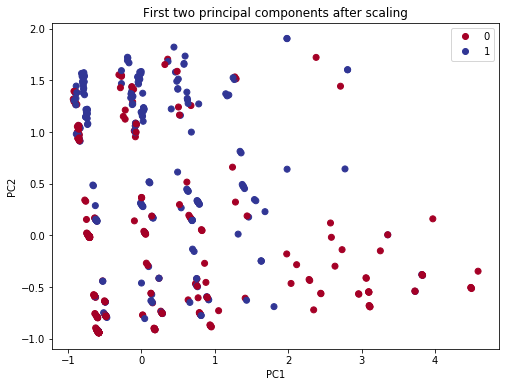

In [60]:
# Performing Component analysis on dat
from sklearn.decomposition import PCA
pca = PCA()
pca_transform = pca.fit_transform(finaldf_age)

plt.figure(figsize=(8,6))

plot=plt.scatter(pca_transform[:,0], pca_transform[:,1],c=y_age,cmap=new_inferno)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("First two principal components after scaling")
plt.legend(handles=plot.legend_elements()[0],labels=list(y_age))
plt.show()

- Doesnt make any sense of using Logistic curves

## Let us build a baseline model
- Dataset with Age
- Lets use Naive Bayes or Decision Trees 

In [61]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [62]:
# Lets start with data set with age
X_train,X_test,y_train,y_test = train_test_split(X_age,y_age, train_size=0.7,random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((499, 21), (499,), (215, 21), (215,))

In [63]:
# Let us fill nulls with 0
X_train=X_train.fillna(0)
X_test =X_test.fillna(0)

## Naive Bayes 

In [64]:
# Gaussian Naive Bayes
gnb = GaussianNB(priors=None)
# Fit the Model
gnb_fit = gnb.fit(X_train,y_train)

In [65]:
# First defining Confusion Matrix
from sklearn.metrics import confusion_matrix
def confusion(model_fit, X,y_true):
    # Predict using the model
    y_pred = model_fit.predict(X)
    #Confusion Matrix
    confusion = confusion_matrix(y_true,y_pred)
    print("\n The Confusion Matrix :\n",confusion)
    # Calculate scores
    TN = confusion[0,0]
    FP = confusion[0,1]
    FN = confusion[1,0]
    TP = confusion[1,1]
    print("Accuracy : ",round(100*(TN+TP)/(TN+TP+FN+FP),2))
    print("Sensitivity : ",round(100*(TP)/(TP+FN),2))
    print("Specificity :",round(100*(TN)/(TN+FP),2))
    print("Precision : ",round(100*(TP)/(TP+FP),2))

In [66]:
print('TRAINING DATA')
confusion(model_fit=gnb_fit,X=X_train,y_true=y_train)
print('\nTEST DATA')
confusion(model_fit=gnb_fit,X=X_test,y_true=y_test)

TRAINING DATA

 The Confusion Matrix :
 [[265  33]
 [107  94]]
Accuracy :  71.94
Sensitivity :  46.77
Specificity : 88.93
Precision :  74.02

TEST DATA

 The Confusion Matrix :
 [[111  15]
 [ 51  38]]
Accuracy :  69.3
Sensitivity :  42.7
Specificity : 88.1
Precision :  71.7


## Decision Tree model




In [67]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dtree = DecisionTreeClassifier(random_state=0)
dtree_fit = dtree.fit(X_train,y_train)

In [69]:
print('\nTRAINING DATA')
confusion(model_fit=dtree_fit,X=X_train,y_true=y_train)
print('\nTest DATA')
confusion(model_fit=dtree_fit,X=X_test,y_true=y_test)


TRAINING DATA

 The Confusion Matrix :
 [[298   0]
 [  4 197]]
Accuracy :  99.2
Sensitivity :  98.01
Specificity : 100.0
Precision :  100.0

Test DATA

 The Confusion Matrix :
 [[102  24]
 [ 31  58]]
Accuracy :  74.42
Sensitivity :  65.17
Specificity : 80.95
Precision :  70.73


## So Far
- Tree based models look more suitable for our study
- But it looks like getting overfit - Trying RandomForest Classifier

## Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc =RandomForestClassifier()
rfc_fit=rfc.fit(X_train,y_train)

In [72]:
print('\nTRAINING DATA')
confusion(model_fit=rfc_fit,X=X_train,y_true=y_train)
print('\nTest DATA')
confusion(model_fit=rfc_fit,X=X_test,y_true=y_test)


TRAINING DATA

 The Confusion Matrix :
 [[296   2]
 [ 11 190]]
Accuracy :  97.39
Sensitivity :  94.53
Specificity : 99.33
Precision :  98.96

Test DATA

 The Confusion Matrix :
 [[106  20]
 [ 33  56]]
Accuracy :  75.35
Sensitivity :  62.92
Specificity : 84.13
Precision :  73.68


- It looks good, reduced overfitting a bit - Lets proceed with RandomForestClassifier

#### Performing similar experiment with noage sets

In [73]:
# Splitting train and test data
X_noage =X_noage.drop('Age_norm',axis=1)
X_train_noage,X_test_noage,y_train_noage,y_test_noage = train_test_split(X_noage,y_noage,train_size=0.8,random_state=42)
X_train_noage.shape,X_test_noage.shape,y_train_noage.shape,y_test_noage.shape

((141, 20), (36, 20), (141,), (36,))

In [74]:
gnb_noage = GaussianNB(priors=None)
gnb_noage_fit = gnb_noage.fit(X_train_noage,y_train_noage)
print('TRAINING DATA:')
confusion(model_fit=gnb_noage_fit,X=X_train_noage,y_true=y_train_noage)
print('\nTEST DATA:')
confusion(model_fit=gnb_noage_fit,X=X_test_noage,y_true=y_test_noage)

TRAINING DATA:

 The Confusion Matrix :
 [[95  5]
 [33  8]]
Accuracy :  73.05
Sensitivity :  19.51
Specificity : 95.0
Precision :  61.54

TEST DATA:

 The Confusion Matrix :
 [[24  1]
 [ 9  2]]
Accuracy :  72.22
Sensitivity :  18.18
Specificity : 96.0
Precision :  66.67


In [75]:
dtree_noage = DecisionTreeClassifier(random_state=0)
dtree_noage_fit = dtree_noage.fit(X_train_noage,y_train_noage)
print('TRAINING DATA:')
confusion(model_fit=dtree_noage_fit,X=X_train_noage,y_true=y_train_noage)
print('\nTEST DATA:')
confusion(model_fit=dtree_noage_fit,X=X_test_noage,y_true=y_test_noage)

TRAINING DATA:

 The Confusion Matrix :
 [[98  2]
 [ 2 39]]
Accuracy :  97.16
Sensitivity :  95.12
Specificity : 98.0
Precision :  95.12

TEST DATA:

 The Confusion Matrix :
 [[23  2]
 [ 1 10]]
Accuracy :  91.67
Sensitivity :  90.91
Specificity : 92.0
Precision :  83.33


In [76]:
rfc_noage =RandomForestClassifier()
rfc_noage_fit=rfc_noage.fit(X_train_noage,y_train_noage)
print('TRAINING DATA:')
confusion(model_fit=rfc_noage_fit,X=X_train_noage,y_true=y_train_noage)
print('\nTEST DATA:')
confusion(model_fit=rfc_noage_fit,X=X_test_noage,y_true=y_test_noage)

TRAINING DATA:

 The Confusion Matrix :
 [[98  2]
 [ 6 35]]
Accuracy :  94.33
Sensitivity :  85.37
Specificity : 98.0
Precision :  94.59

TEST DATA:

 The Confusion Matrix :
 [[22  3]
 [ 1 10]]
Accuracy :  88.89
Sensitivity :  90.91
Specificity : 88.0
Precision :  76.92


- Decision Tree model is working better here for noage dataframes

##### For DataFrames with age,  will continue with RandomForest
#### For DataFrames without age, will continue with DecisionTreeClassifier

## Model with Age

In [77]:
# Removing variable Embarked__Q and SibSp- showing lowest variance for S
X_age = X_age.drop(['Embarked__Q','SibSp'],axis=1)
X_age.head()

,Pclass,Parch,gender,Embarked__C,Embarked__S,CabinClass__A1,CabinClass__B1,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1,Age_norm,Fare_norm
0,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.271174,0.014151
1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0.472229,0.139136
2,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.321438,0.015469
3,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.434531,0.103644
4,3,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.434531,0.015713


In [78]:
# Train Test split
X_train_age,X_test_age,y_train_age,y_test_age = train_test_split(X_age,y_age,train_size=0.70,random_state=42)
X_train_age.shape,X_test_age.shape,y_train_age.shape,y_test_age.shape

((499, 19), (215, 19), (499,), (215,))

In [79]:
# Setting Up GridSearchCV to find out the best parameter to tune with
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"]
}

# n_folds
n_folds =5 

# Instantiate GridSearch Model ( Random Forest )
rfc_grid = RandomForestClassifier(random_state=42)

# Grid Search Model
rfc_grid_search = GridSearchCV(estimator=rfc_grid,
                              param_grid = param_grid,
                              cv=n_folds,
                              verbose=1)

# Fitting Grid search to data
rfc_grid_search.fit(X_train_age,y_train_age)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:   55.4s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'

In [80]:
# What is the best accuracy score and best hyper parameters?
print(" Best Score :",rfc_grid_search.best_score_)

# Best Hyperparameters?
print('Best Hyperparameters :',rfc_grid_search.best_estimator_)

 Best Score : 0.8016032064128257
Best Hyperparameters : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


### Trying Adaboost
- Using RandomForest as Base estimator

In [81]:
# Base Estimator 
rfc_base = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
# Adaboost model - Training to check if it improves the scores of our model
adaboost_model_1 = AdaBoostClassifier(base_estimator=rfc_base,algorithm="SAMME")
adaboost_model_1.fit(X_train_age,y_train_age)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                            

In [84]:
# Check Training accuracy?
print('Training:')
confusion(model_fit=adaboost_model_1,X=X_train_age,y_true=y_train_age)

Training:

 The Confusion Matrix :
 [[286  12]
 [ 26 175]]
Accuracy :  92.38
Sensitivity :  87.06
Specificity : 95.97
Precision :  93.58


#### Good News: Now tuning hyper parameter 

In [85]:
# Param grid :
param_grid = {'base_estimator__max_depth':[2,5],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7,0.8,0.9,1.]}

# folds
n_folds =3

# Adaboost Initialization with base model
abc_rfc = AdaBoostClassifier(base_estimator=rfc_base,
                            algorithm='SAMME')

# Setup Grid Search
grid_search_abc = GridSearchCV(abc_rfc,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='roc_auc')

In [86]:
# Run Grid search
grid_search_abc.fit(X_train_age,y_train_age)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=5,
                                                                                max_features='auto',
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_sam

In [87]:
# Results of Grid search
pd.DataFrame(grid_search_abc.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.578975,0.245056,0.058298,0.023598,2,0.5,100,"{'base_estimator__max_depth': 2, 'learning_rat...",0.865522,0.890547,0.839515,0.865195,0.020814,2,0.933835,0.920311,0.964862,0.939669,0.018650
1,0.792842,0.238267,0.084615,0.019555,2,0.5,200,"{'base_estimator__max_depth': 2, 'learning_rat...",0.843657,0.911880,0.831826,0.862416,0.035256,4,0.957240,0.944574,0.939605,0.947140,0.007425
2,1.063672,0.321207,0.127588,0.055520,2,0.5,300,"{'base_estimator__max_depth': 2, 'learning_rat...",0.852985,0.889718,0.826248,0.856310,0.025993,17,0.969245,0.947574,0.946017,0.954279,0.010602
3,0.527674,0.106837,0.058963,0.010795,2,0.5,400,"{'base_estimator__max_depth': 2, 'learning_rat...",0.850000,0.911051,0.820594,0.860527,0.037640,8,0.945123,0.934542,0.930061,0.936575,0.006315
4,0.426735,0.102904,0.045972,0.009410,2,0.5,500,"{'base_estimator__max_depth': 2, 'learning_rat...",0.860224,0.903513,0.832353,0.865353,0.029249,1,0.933043,0.912267,0.945905,0.930405,0.013859
5,0.621283,0.133824,0.064294,0.014963,2,0.5,600,"{'base_estimator__max_depth': 2, 'learning_rat...",0.867463,0.893336,0.808232,0.856366,0.035590,16,0.943653,0.935386,0.945792,0.941610,0.004487
6,0.410746,0.131744,0.043306,0.012465,2,0.6,100,"{'base_estimator__max_depth': 2, 'learning_rat...",0.845896,0.894995,0.833861,0.858226,0.026422,14,0.927635,0.905348,0.950555,0.927846,0.018456
7,0.374103,0.261940,0.039974,0.026865,2,0.6,200,"{'base_estimator__max_depth': 2, 'learning_rat...",0.869403,0.921152,0.801221,0.863936,0.049066,3,0.912408,0.897547,0.962237,0.924064,0.027666
8,0.662588,0.281285,0.069624,0.028842,2,0.6,300,"{'base_estimator__max_depth': 2, 'learning_rat...",0.861119,0.892281,0.829715,0.861039,0.025517,5,0.926504,0.944874,0.969568,0.946982,0.017644
9,0.631942,0.219037,0.069292,0.021283,2,0.6,400,"{'base_estimator__max_depth': 2, 'learning_rat...",0.855821,0.897558,0.828283,0.860544,0.028451,7,0.950889,0.958149,0.946692,0.951910,0.004732


In [88]:
# Best AUC score and estimators
print('Best AUC: ',grid_search_abc.best_score_)
print('Best Estimators: ',grid_search_abc.best_estimator_)

Best AUC:  0.8653530353334438
Best Estimators:  AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                      

In [89]:
# Best training Score for AdaBoost
adaboost_final = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=42,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.5, n_estimators=400, random_state=42)

adaboost_final_fit = adaboost_final.fit(X_train_age,y_train_age)

In [90]:
# Training metrics
print('TRAINING_ METRICS_')
confusion(model_fit=adaboost_final_fit,X=X_train_age,y_true=y_train_age)

TRAINING_ METRICS_

 The Confusion Matrix :
 [[273  25]
 [ 49 152]]
Accuracy :  85.17
Sensitivity :  75.62
Specificity : 91.61
Precision :  85.88


In [91]:
# TEST metrics
print('TEST_ METRICS_')
confusion(model_fit=adaboost_final_fit,X=X_test_age,y_true=y_test_age)

TEST_ METRICS_

 The Confusion Matrix :
 [[107  19]
 [ 28  61]]
Accuracy :  78.14
Sensitivity :  68.54
Specificity : 84.92
Precision :  76.25


## Trying XGBoost

In [92]:
#!pip install XGBoost

In [93]:
from xgboost import XGBClassifier

In [94]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3,0.4,0.5, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      

In [95]:
# Fitting Gridsearch
model_cv_fit = model_cv.fit(X_train_age,y_train_age)

[10:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:42:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:42:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [96]:
# Best score
model_cv.best_score_

0.8633121279074615

In [97]:
# Best Hyperparams
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.4, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [98]:
# XGB Model
xgbmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.9, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

xgbmodel_fit = xgbmodel.fit(X_train_age,y_train_age)

[10:42:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [99]:
# Checking on Evaluation Metrics
print('TRAINING DATA:')
confusion(model_fit=xgbmodel_fit,X=X_train_age,y_true=y_train_age)

TRAINING DATA:

 The Confusion Matrix :
 [[286  12]
 [ 32 169]]
Accuracy :  91.18
Sensitivity :  84.08
Specificity : 95.97
Precision :  93.37


In [100]:
# How does it score against test data
print('TEST DATA')
confusion(model_fit=xgbmodel_fit,X=X_test_age,y_true=y_test_age)

TEST DATA

 The Confusion Matrix :
 [[107  19]
 [ 30  59]]
Accuracy :  77.21
Sensitivity :  66.29
Specificity : 84.92
Precision :  75.64


- The XGBoost model is working well
- But there is small difference between train and test experiments


In [101]:
finaldf_numeric.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,gender,Embarked__Q,Embarked__S,CabinClass__A1,...,CabinClass__C1,CabinClass__D1,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587,0.086420,0.722783,0.016835,...,0.066218,0.032548,0.004489,0.028058,0.004489,0.003367,0.008979,0.005612,0.004489,0.001122
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990,0.281141,0.447876,0.128725,...,0.248802,0.177549,0.066890,0.165232,0.066890,0.057961,0.094383,0.074743,0.066890,0.033501
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [102]:
# Converting them to groups
def ageclub(age):
    if age<=10:
        return 1
    elif age>10 and age<=20:
        return 2
    elif age>20 and age<=30:
        return 3
    elif age>30 and age<=40:
        return 4
    elif age>40 and age<=50:
        return 5
    elif age>50 and age<=60:
        return 6
    elif age>60:
        return 7
    
finaldf_numeric['Agegroup'] = finaldf_numeric['Age'].map(lambda x: ageclub(x))

def fareclub(fare):
    if fare<=30:
        return 1
    elif fare>30 and fare<=60:
        return 2
    elif fare>60 and fare <=90:
        return 3
    elif fare>90 and fare<=120:
        return 4
    else:
        return 5


finaldf_numeric['FareRange'] = finaldf_numeric['Fare'].map(lambda x: fareclub(x))

# Dropping age variable 
reprocessed_finaldf = finaldf_numeric.drop(['Age','Fare'],axis=1)
reprocessed_finaldf.head()

,Survived,Pclass,SibSp,Parch,gender,Embarked__Q,Embarked__S,CabinClass__A1,CabinClass__B1,CabinClass__C1,...,CabinClass__D2,CabinClass__E1,CabinClass__E2,CabinClass__E3,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__T1,Agegroup,FareRange
0,0,3,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.0,1
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,4.0,3
2,1,3,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,3.0,1
3,1,1,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,4.0,2
4,0,3,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,4.0,1


In [103]:
reprocessed_finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 21 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
SibSp             891 non-null int64
Parch             891 non-null int64
gender            891 non-null int64
Embarked__Q       891 non-null uint8
Embarked__S       891 non-null uint8
CabinClass__A1    891 non-null uint8
CabinClass__B1    891 non-null uint8
CabinClass__C1    891 non-null uint8
CabinClass__D1    891 non-null uint8
CabinClass__D2    891 non-null uint8
CabinClass__E1    891 non-null uint8
CabinClass__E2    891 non-null uint8
CabinClass__E3    891 non-null uint8
CabinClass__F2    891 non-null uint8
CabinClass__F3    891 non-null uint8
CabinClass__G3    891 non-null uint8
CabinClass__T1    891 non-null uint8
Agegroup          714 non-null float64
FareRange         891 non-null int64
dtypes: float64(1), int64(6), uint8(14)
memory usage: 67.9 KB


In [104]:
Age_re = reprocessed_finaldf[~reprocessed_finaldf['Agegroup'].isnull()].copy()
NoAge_re=reprocessed_finaldf[reprocessed_finaldf['Agegroup'].isnull()].copy()

In [105]:
## Age_re- Split
y_age_re = Age_re.pop('Survived')
X_age_re = Age_re

y_noage_re= NoAge_re.pop('Survived')
X_noage_re = NoAge_re

In [106]:
# Retraining Models and re applying models with previous setups
X_train_age_re,X_test_age_re,y_train_age_re,y_test_age_re = train_test_split(X_age_re,y_age_re,train_size=0.8,random_state=42)
X_train_noage_re,X_test_noage_re,y_train_noage_re,y_test_noage_re = train_test_split(X_noage_re,y_noage_re,train_size=0.8,random_state=42)

### Random Forest Classifier

In [107]:
# Setting Up GridSearchCV to find out the best parameter to tune with

# Setting up parameter grid
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"]
}

# n_folds
n_folds =5 

# Instantiate GridSearch Model ( Random Forest )
rfc_grid_age = RandomForestClassifier(random_state=42)

# Grid Search Model
rfc_grid_search_age = GridSearchCV(estimator=rfc_grid_age,
                              param_grid = param_grid,
                              cv=n_folds,
                              verbose=1)

# Fitting Grid search to data
rfc_grid_search_age_fit=rfc_grid_search_age.fit(X_train_age_re,y_train_age_re)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3240 out of 3240 | elapsed:  1.1min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [108]:
# What is the best accuracy score and best hyper parameters?
print(" Best Score :",rfc_grid_search.best_score_)

# Best Hyperparameters?
print('Best Hyperparameters :',rfc_grid_search.best_estimator_)

 Best Score : 0.8016032064128257
Best Hyperparameters : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)


In [109]:
rfc_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rfc_best_fit =rfc_best.fit(X_train_age_re,y_train_age_re)

In [110]:
print('TRAINING DATA:')
confusion(model_fit=rfc_best_fit,X=X_train_age_re,y_true=y_train_age_re)
print('\nTEST DATA:')
confusion(model_fit=rfc_best_fit,X=X_test_age_re,y_true=y_test_age_re)

TRAINING DATA:

 The Confusion Matrix :
 [[315  22]
 [ 89 145]]
Accuracy :  80.56
Sensitivity :  61.97
Specificity : 93.47
Precision :  86.83

TEST DATA:

 The Confusion Matrix :
 [[81  6]
 [23 33]]
Accuracy :  79.72
Sensitivity :  58.93
Specificity : 93.1
Precision :  84.62


### Trying Adaboost

In [111]:
# Param grid :
param_grid = {'base_estimator__max_depth':[2,5],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7,0.8,0.9,1.]}

# folds
n_folds =3

# Adaboost Initialization with base model
abc_rfc_age_re = AdaBoostClassifier(base_estimator=rfc_best,
                            algorithm='SAMME')

# Setup Grid Search
grid_search_abc_age_re = GridSearchCV(abc_rfc_age_re,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='roc_auc')

In [112]:
# Run Grid search
grid_abc_age_refit = grid_search_abc_age_re.fit(X_train_age_re,y_train_age_re)

In [113]:
# Best AUC score and estimators
print('Best AUC: ',grid_search_abc.best_score_)
print('Best Estimators: ',grid_search_abc.best_estimator_)

Best AUC:  0.8653530353334438
Best Estimators:  AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                      

In [114]:
adaboost_re_age = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=42,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.5, n_estimators=200, random_state=None)

adaboost_re_age_fit =adaboost_re_age.fit(X_train_age_re,y_train_age_re)

In [115]:
print('TRAINING DATA:')
confusion(model_fit=adaboost_re_age_fit,X=X_train_age_re,y_true=y_train_age_re)
print('\nTEST DATA:')
confusion(model_fit=adaboost_re_age_fit,X=X_test_age_re,y_true=y_test_age_re)

TRAINING DATA:

 The Confusion Matrix :
 [[303  34]
 [ 59 175]]
Accuracy :  83.71
Sensitivity :  74.79
Specificity : 89.91
Precision :  83.73

TEST DATA:

 The Confusion Matrix :
 [[71 16]
 [15 41]]
Accuracy :  78.32
Sensitivity :  73.21
Specificity : 81.61
Precision :  71.93


## xgboost

In [ ]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3,0.4,0.5, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)      

In [116]:
# Fitting Gridsearch
model_cv_fit = model_cv.fit(X_train_age_re,y_train_age_re)

[10:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[10:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [117]:
# Best Hyperparams
model_cv.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=2, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.6, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

In [118]:
xgb_best_re = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)
xgb_best_re_fit =xgb_best_re.fit(X_train_age_re,y_train_age_re)

[10:46:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [119]:
print('TRAINING DATA:')
confusion(model_fit=xgb_best_re_fit,X=X_train_age_re,y_true=y_train_age_re)
print('\nTEST DATA:')
confusion(model_fit=xgb_best_re_fit,X=X_test_age_re,y_true=y_test_age_re)

TRAINING DATA:

 The Confusion Matrix :
 [[307  30]
 [ 45 189]]
Accuracy :  86.87
Sensitivity :  80.77
Specificity : 91.1
Precision :  86.3

TEST DATA:

 The Confusion Matrix :
 [[69 18]
 [15 41]]
Accuracy :  76.92
Sensitivity :  73.21
Specificity : 79.31
Precision :  69.49


- Doesnt improve at all - wrong predictions increase

- xgbmodel_fit : this model scored the best
- Adaboost+ RandomForest for 2nd Case also scored pretty good.

## Now Passengers data without Age

In [120]:
X_train_noage.shape,y_train_noage.shape,X_test_noage.shape,y_test_noage.shape

((141, 20), (141,), (36, 20), (36,))

#### For this case, let us boost existing decision Tree Model

In [122]:
dtree_noage = DecisionTreeClassifier(random_state=42)
dtree_noage_fit =dtree_noage.fit(X_train_noage,y_train_noage)

In [124]:
print('TRAINING DATA:')
confusion(model_fit=dtree_noage_fit,X=X_train_noage,y_true=y_train_noage)
print('\nTEST DATA:')
confusion(model_fit=dtree_noage_fit,X=X_test_noage,y_true=y_test_noage)

TRAINING DATA:

 The Confusion Matrix :
 [[98  2]
 [ 2 39]]
Accuracy :  97.16
Sensitivity :  95.12
Specificity : 98.0
Precision :  95.12

TEST DATA:

 The Confusion Matrix :
 [[21  4]
 [ 1 10]]
Accuracy :  86.11
Sensitivity :  90.91
Specificity : 84.0
Precision :  71.43


- It is getting better result than expected

## Keeping Both cases together for training whole dataset

In [126]:
titanic = titanic_bkp.copy()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [138]:
def preprocess_data(titanic):
    #  Preprocess Data
    titanic['gender'] = titanic['Sex'].map({'male':1,'female':0})
    titanic['Cabin'] = titanic['Cabin'].fillna('X')
    titanic['Cabin_Class'] = titanic['Cabin'].map(lambda x: str(x)[0])
    titanic['CabinClass_Pclass']=titanic['Cabin_Class'] + titanic['Pclass'].astype(str)
    
    
    finaldf = titanic[['Survived', 'Pclass','Age', 'SibSp','Parch','Fare', 'Embarked', 'gender','CabinClass_Pclass']].copy()
    embarked = pd.get_dummies(finaldf['Embarked'],prefix='Embarked_')
    finaldf = pd.concat([finaldf,embarked],axis=1)
    
    cabinclass = pd.get_dummies(finaldf['CabinClass_Pclass'],prefix='CabinClass_')
    finaldf = pd.concat([finaldf,cabinclass],axis=1)
    
    finaldf_numeric = finaldf.drop(['Embarked','CabinClass_Pclass','Embarked__C'],axis=1)
    
    def ageclub(age):
        if age<=10:
            return 1
        elif age>10 and age<=20:
            return 2
        elif age>20 and age<=30:
            return 3
        elif age>30 and age<=40:
            return 4
        elif age>40 and age<=50:
            return 5
        elif age>50 and age<=60:
            return 6
        elif age>60:
            return 7
            
    finaldf_numeric['AgeGroup'] = finaldf_numeric['Age'].map(lambda x: ageclub(x))
    finaldf_numeric['AgeGroup'] =finaldf_numeric['AgeGroup'].fillna(99)
    
    
    def fareclub(fare):
        if fare<=30:
            return 1
        elif fare>30 and fare<=60:
            return 2
        elif fare>60 and fare <=90:
            return 3
        elif fare>90 and fare<=120:
            return 4
        else:
            return 5
        
    finaldf_numeric['FareRange'] = finaldf_numeric['Fare'].map(lambda x: fareclub(x))
    
    reprocessed_finaldf = finaldf_numeric.drop(['Age','Fare'],axis=1)
    
    return reprocessed_finaldf
    

In [139]:
titanic_new = preprocess_data(titanic)

In [140]:
titanic_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
Survived          891 non-null int64
Pclass            891 non-null int64
SibSp             891 non-null int64
Parch             891 non-null int64
gender            891 non-null int64
Embarked__Q       891 non-null uint8
Embarked__S       891 non-null uint8
CabinClass__A1    891 non-null uint8
CabinClass__B1    891 non-null uint8
CabinClass__C1    891 non-null uint8
CabinClass__D1    891 non-null uint8
CabinClass__D2    891 non-null uint8
CabinClass__E1    891 non-null uint8
CabinClass__E2    891 non-null uint8
CabinClass__E3    891 non-null uint8
CabinClass__F2    891 non-null uint8
CabinClass__F3    891 non-null uint8
CabinClass__G3    891 non-null uint8
CabinClass__T1    891 non-null uint8
CabinClass__X1    891 non-null uint8
CabinClass__X2    891 non-null uint8
CabinClass__X3    891 non-null uint8
AgeGroup          891 non-null float64
FareRange         891 non-null int64
dtype

## Training and testing model on XGBoost and AdaBoost



In [142]:
train_df,test_df = train_test_split(titanic_new,train_size=0.7,random_state=42)
train_df.shape,test_df.shape

((623, 24), (268, 24))

In [143]:
# splitting X and y
y_train = train_df.pop('Survived')
X_train = train_df

y_test = test_df.pop('Survived')
X_test = test_df

## Decision Tree

In [165]:
# Setting up parameter grid
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"],
    'class_weight':[{0:1,1:1},{0:1.5,1:1},{0:1.6,1:1},None]
}

# n_folds
n_folds =5 

# Instantiate GridSearch Model ( Random Forest )
dtree_grid = DecisionTreeClassifier(random_state=42)

# Grid Search Model
dtree_grid_search = GridSearchCV(estimator=dtree_grid,
                              param_grid = param_grid,
                              cv=n_folds,
                              scoring='accuracy',
                              verbose=1)

# Fitting Grid search to data
dtree_grid_search_fit = dtree_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 12960 out of 12960 | elapsed:  1.1min finished


In [166]:
# Getting best score and estimators
print('Best score: ',dtree_grid_search.best_score_)
print('Best Estimator',dtree_grid_search.best_estimator_)

Best score:  0.8298555377207063
Best Estimator DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')


In [167]:
# Boosting prediction
best_dtree = DecisionTreeClassifier(class_weight={0: 1, 1: 1}, criterion='entropy',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

# Param grid :
param_grid = {'base_estimator__max_depth':[2,5],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7]}

# folds
n_folds =5

# Adaboost Initialization with base model
abc_best = AdaBoostClassifier(base_estimator=best_dtree,
                            algorithm='SAMME')

# Setup Grid Search
abc_best_grid_search = GridSearchCV(abc_best,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='accuracy')
# Fitting Grid Search
abc_best_grid_search_fit = abc_best_grid_search.fit(X_train,y_train)

In [168]:
# Getting best score and estimators
print('Best score: ',abc_best_grid_search.best_score_)
print('Best Estimator',abc_best_grid_search.best_estimator_)

Best score:  0.826645264847512
Best Estimator AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                 

In [169]:
# Best Adaboosted Tree Classifier 
abc_best_dtree = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.7, n_estimators=200, random_state=None)

abc_best_dtree_fit = abc_best_dtree.fit(X_train,y_train)

print('TRAINING DATA:')
confusion(model_fit=abc_best_dtree_fit,X=X_train,y_true=y_train)
print('\nTEST DATA:')
confusion(model_fit=abc_best_dtree_fit,X=X_test,y_true=y_test)

TRAINING DATA:

 The Confusion Matrix :
 [[347  45]
 [ 55 176]]
Accuracy :  83.95
Sensitivity :  76.19
Specificity : 88.52
Precision :  79.64

TEST DATA:

 The Confusion Matrix :
 [[138  19]
 [ 28  83]]
Accuracy :  82.46
Sensitivity :  74.77
Specificity : 87.9
Precision :  81.37


## Random Forest

In [170]:
# Setting Up GridSearchCV to find out the best parameter to tune with

# Setting up parameter grid
param_grid = {
    'max_depth': range(5, 25, 5),
    'min_samples_leaf': range(10, 100, 10),
    'min_samples_split': range(10, 100, 10),
    'criterion': ["entropy", "gini"],
    'class_weight':[{0:1,1:1},{0:1.5,1:1},{0:1.6,1:1},None]
}

# n_folds
n_folds =5 

# Instantiate GridSearch Model ( Random Forest )
rfc = RandomForestClassifier(random_state=42)

# Grid Search Model
rfc_grid_search = GridSearchCV(estimator=rfc,
                              param_grid = param_grid,
                              cv=n_folds,
                              scoring='accuracy',
                              verbose=1)

# Fitting Grid search to data
rfc_grid_search_fit=rfc_grid_search.fit(X_train,y_train)

# Getting best score and estimators
print('Best score: ',rfc_grid_search.best_score_)
print('Best Estimator',rfc_grid_search.best_estimator_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best score:  0.7993579454253612
Best Estimator RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=40, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)


[Parallel(n_jobs=1)]: Done 12960 out of 12960 | elapsed:  4.7min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [171]:
# Boosting prediction
best_rf = RandomForestClassifier(bootstrap=True, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=10,
                       min_samples_split=40, min_weight_fraction_leaf=0.0,
                       n_estimators=10, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

# Param grid :
param_grid = {'base_estimator__max_depth':[2,5,10],
             'n_estimators':[100,200,300,400,500,600],
             'learning_rate':[0.5,0.6,0.7,0.8,0.9,1.]}

# folds
n_folds =5

# Adaboost Initialization with base model
abc_best = AdaBoostClassifier(base_estimator=best_rf,
                            algorithm='SAMME')

# Setup Grid Search
abc_best_grid_search = GridSearchCV(abc_best,
                              cv=n_folds,
                              param_grid=param_grid,
                              return_train_score=True,
                              scoring='accuracy')
# Fitting Grid Search
abc_best_grid_search_fit = abc_best_grid_search.fit(X_train,y_train)

In [172]:
# Getting best score and estimators
print('Best score: ',abc_best_grid_search.best_score_)
print('Best Estimator',abc_best_grid_search.best_estimator_)

Best score:  0.826645264847512
Best Estimator AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_wei

In [175]:
# Best Adaboosted RF Classifier 
abc_best_rf = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=42,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.9, n_estimators=600, random_state=None)

abc_best_rf_fit = abc_best_rf.fit(X_train,y_train)

print('TRAINING DATA:')
confusion(model_fit=abc_best_rf_fit,X=X_train,y_true=y_train)
print('\nTEST DATA:')
confusion(model_fit=abc_best_rf_fit,X=X_test,y_true=y_test)

TRAINING DATA:

 The Confusion Matrix :
 [[358  34]
 [ 63 168]]
Accuracy :  84.43
Sensitivity :  72.73
Specificity : 91.33
Precision :  83.17

TEST DATA:

 The Confusion Matrix :
 [[139  18]
 [ 32  79]]
Accuracy :  81.34
Sensitivity :  71.17
Specificity : 88.54
Precision :  81.44


## XGBoost

In [161]:
# creating a KFold object 
folds = 5

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2,0.3,0.4,0.5, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier()

# set up GridSearchCV()
xgb_grid_search = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 0,
                        return_train_score=True)  
# Fitting grid search
xgb_grid_search_fit = xgb_grid_search.fit(X_train,y_train)

[13:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[13:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:08:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [162]:
# Getting best score and estimators
print('Best score: ',xgb_grid_search.best_score_)
print('Best Estimator',xgb_grid_search.best_estimator_)

Best score:  0.8041733547351525
Best Estimator XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)


In [163]:
# Best XGBoost Classifier 
xgb_best_rf = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

xgb_best_rf = xgb_best_rf.fit(X_train,y_train)

print('TRAINING DATA:')
confusion(model_fit=xgb_best_rf,X=X_train,y_true=y_train)
print('\nTEST DATA:')
confusion(model_fit=xgb_best_rf,X=X_test,y_true=y_test)

[13:10:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING DATA:

 The Confusion Matrix :
 [[358  34]
 [ 45 186]]
Accuracy :  87.32
Sensitivity :  80.52
Specificity : 91.33
Precision :  84.55

TEST DATA:

 The Confusion Matrix :
 [[136  21]
 [ 31  80]]
Accuracy :  80.6
Sensitivity :  72.07
Specificity : 86.62
Precision :  79.21


## Training the best Models  with entire dataset

In [177]:
y = titanic_new['Survived']
X = titanic_new.drop('Survived',axis=1)

#### 1. Boosted Dtree

In [178]:
# Best Adaboosted Tree Classifier 
abc_best_dtree = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='entropy',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=10,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                                                         splitter='best'),
                   learning_rate=0.7, n_estimators=200, random_state=None)

abc_best_dtree_fit = abc_best_dtree.fit(X,y)

print('TRAINING DATA:')
confusion(model_fit=abc_best_dtree_fit,X=X,y_true=y)

TRAINING DATA:

 The Confusion Matrix :
 [[479  70]
 [ 88 254]]
Accuracy :  82.27
Sensitivity :  74.27
Specificity : 87.25
Precision :  78.4


#### 2. Best Random Forest model

In [179]:
# Best Adaboosted RF Classifier 
abc_best_rf = AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         class_weight={0: 1,
                                                                       1: 1},
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=10,
                                                         min_samples_split=40,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=10,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=42,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=0.9, n_estimators=600, random_state=None)

abc_best_rf_fit = abc_best_rf.fit(X,y)

print('TRAINING DATA:')
confusion(model_fit=abc_best_rf_fit,X=X,y_true=y)


TRAINING DATA:

 The Confusion Matrix :
 [[495  54]
 [ 88 254]]
Accuracy :  84.06
Sensitivity :  74.27
Specificity : 90.16
Precision :  82.47


#### 3. Best XGBoost Model


In [180]:
# Best XGBoost Classifier 
xgb_best = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.6, max_delta_step=0,
              max_depth=6, min_child_weight=1,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.3, tree_method='exact',
              use_label_encoder=True, validate_parameters=1, verbosity=None)

xgb_best_fit = xgb_best_rf.fit(X,y)

print('TRAINING DATA:')
confusion(model_fit=xgb_best_fit,X=X,y_true=y)

[14:17:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
TRAINING DATA:

 The Confusion Matrix :
 [[499  50]
 [ 70 272]]
Accuracy :  86.53
Sensitivity :  79.53
Specificity : 90.89
Precision :  84.47


## Predicting on test.csv

In [182]:
# Reading test.csv
test_titanic = pd.read_csv('data/test.csv')
test_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [185]:
 test_titanic['Fare'] = test_titanic['Fare'].fillna(round(test_titanic['Fare'].mean(),2))

In [186]:
test_titanic.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627195
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [187]:
test_titanic_bkp = test_titanic.copy()

In [195]:
def preprocess_data_test(titanic):
    #  Preprocess Data
    titanic['gender'] = titanic['Sex'].map({'male':1,'female':0})
    titanic['Cabin'] = titanic['Cabin'].fillna('X')
    titanic['Cabin_Class'] = titanic['Cabin'].map(lambda x: str(x)[0])
    titanic['CabinClass_Pclass']=titanic['Cabin_Class'] + titanic['Pclass'].astype(str)
    
    
    finaldf = titanic[['PassengerId','Pclass','Age', 'SibSp','Parch','Fare', 'Embarked', 'gender','CabinClass_Pclass']].copy()
    embarked = pd.get_dummies(finaldf['Embarked'],prefix='Embarked_')
    finaldf = pd.concat([finaldf,embarked],axis=1)
    
    cabinclass = pd.get_dummies(finaldf['CabinClass_Pclass'],prefix='CabinClass_')
    finaldf = pd.concat([finaldf,cabinclass],axis=1)
    
    finaldf_numeric = finaldf.drop(['Embarked','CabinClass_Pclass','Embarked__C'],axis=1)
    
    def ageclub(age):
        if age<=10:
            return 1
        elif age>10 and age<=20:
            return 2
        elif age>20 and age<=30:
            return 3
        elif age>30 and age<=40:
            return 4
        elif age>40 and age<=50:
            return 5
        elif age>50 and age<=60:
            return 6
        elif age>60:
            return 7
            
    finaldf_numeric['AgeGroup'] = finaldf_numeric['Age'].map(lambda x: ageclub(x))
    finaldf_numeric['AgeGroup'] =finaldf_numeric['AgeGroup'].fillna(99)
    
    
    def fareclub(fare):
        if fare<=30:
            return 1
        elif fare>30 and fare<=60:
            return 2
        elif fare>60 and fare <=90:
            return 3
        elif fare>90 and fare<=120:
            return 4
        else:
            return 5
        
    finaldf_numeric['FareRange'] = finaldf_numeric['Fare'].map(lambda x: fareclub(x))
    
    reprocessed_finaldf = finaldf_numeric.drop(['Age','Fare'],axis=1)
    
    return reprocessed_finaldf
    

In [196]:
test_titanic_pred = preprocess_data_test(test_titanic)
test_titanic_pred.head()

,PassengerId,Pclass,SibSp,Parch,gender,Embarked__Q,Embarked__S,CabinClass__A1,CabinClass__B1,CabinClass__C1,...,CabinClass__D2,CabinClass__E1,CabinClass__F2,CabinClass__F3,CabinClass__G3,CabinClass__X1,CabinClass__X2,CabinClass__X3,AgeGroup,FareRange
0,892,3,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,4.0,1
1,893,3,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,5.0,1
2,894,2,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,7.0,1
3,895,3,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,3.0,1
4,896,3,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,3.0,1


In [198]:
test_df = test_titanic_pred.drop('PassengerId',axis=1)

In [205]:
X.columns

Index(['Pclass', 'SibSp', 'Parch', 'gender', 'Embarked__Q', 'Embarked__S',
       'CabinClass__A1', 'CabinClass__B1', 'CabinClass__C1', 'CabinClass__D1',
       'CabinClass__D2', 'CabinClass__E1', 'CabinClass__E2', 'CabinClass__E3',
       'CabinClass__F2', 'CabinClass__F3', 'CabinClass__G3', 'CabinClass__T1',
       'CabinClass__X1', 'CabinClass__X2', 'CabinClass__X3', 'AgeGroup',
       'FareRange'],
      dtype='object')

In [207]:
test_df['CabinClass__E2']=0
test_df['CabinClass__E3']=0
test_df['CabinClass__T1']=0
test_df = test_df[X.columns]

##### Predictions


In [208]:
# Deciston Tree
print('Decision Tree:')
test_titanic_pred['DTree_pred'] = abc_best_dtree_fit.predict(test_df)
print(test_titanic_pred['DTree_pred'].value_counts())
# Random Forest
print('Random Forest')
test_titanic_pred['RF_pred'] = abc_best_rf_fit.predict(test_df)
print(test_titanic_pred['RF_pred'].value_counts())
# XGBoost GBTree
print('XGBoost')
test_titanic_pred['XGB_pred'] = xgb_best_fit.predict(test_df)
print(test_titanic_pred['XGB_pred'].value_counts())

Decision Tree:
0    259
1    159
Name: DTree_pred, dtype: int64
Random Forest
0    277
1    141
Name: RF_pred, dtype: int64
XGBoost
0    265
1    153
Name: XGB_pred, dtype: int64


## Selecting Decision Tree Prediction 

In [210]:
# Final Output 
test_titanic_pred_final = test_titanic_pred[['PassengerId','DTree_pred']].copy()

In [211]:
test_titanic.shape,test_titanic_pred_final.shape

((418, 14), (418, 2))

In [212]:
test_titanic_pred_final.columns = ['PassengerId','Survived']

In [213]:
test_titanic_pred_final.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [214]:
test_titanic_pred_final.to_csv('titanic_test_predicted.csv',index=False)